# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드

In [5]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df_null = df.isnull()
df_null.sum() #결측치 없음!

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#수치 데이터에 대한 요약
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화

In [16]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [18]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

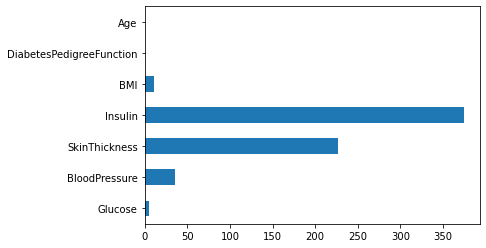

In [19]:
df_null.sum().plot.barh()

In [20]:
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

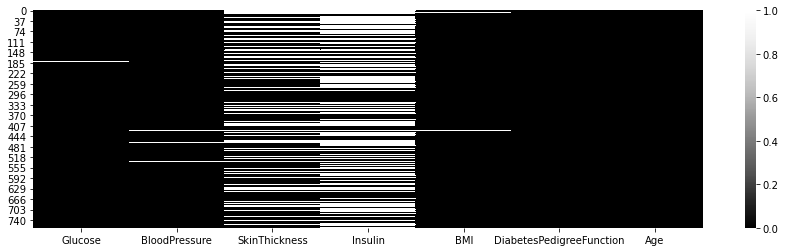

In [24]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

# 정답값

In [27]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [33]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

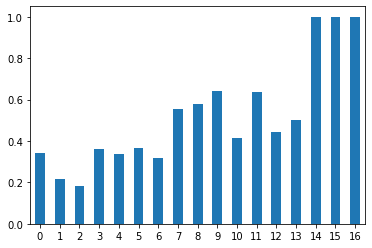

In [38]:
df_po["mean"].plot.bar(rot=0) #임신 횟수에 발병 비율 비례

# countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

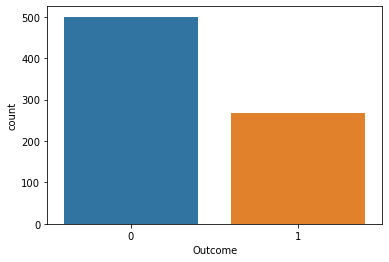

In [39]:
sns.countplot(data=df, x="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

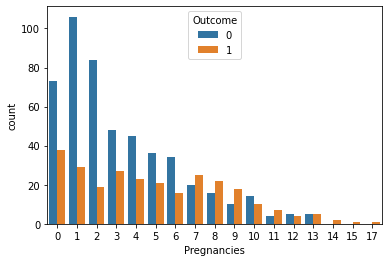

In [42]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [46]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

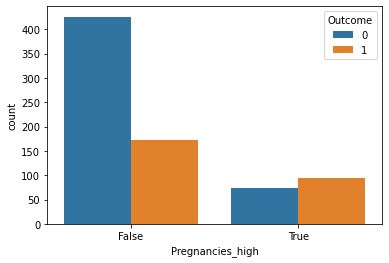

In [49]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

# barplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

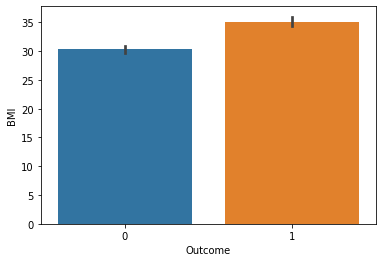

In [50]:
sns.barplot(data=df, x="Outcome", y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

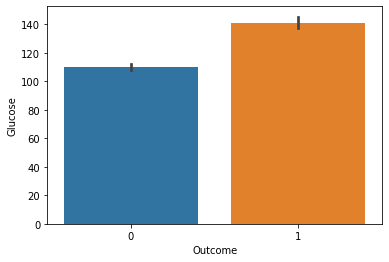

In [51]:
sns.barplot(data=df, x="Outcome", y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

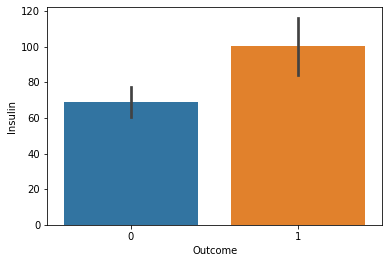

In [52]:
sns.barplot(data=df, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

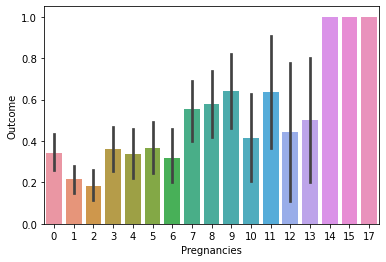

In [53]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

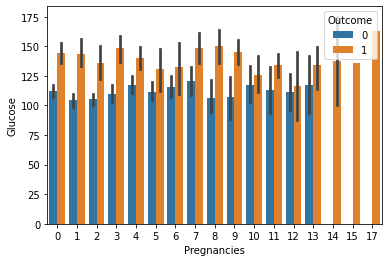

In [55]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

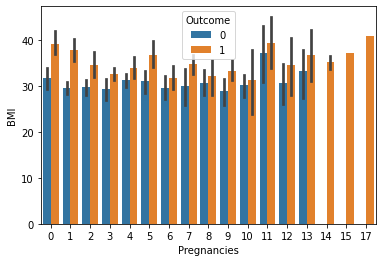

In [56]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

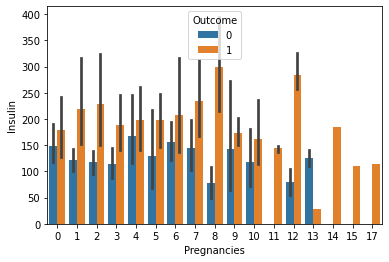

In [62]:
sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

# boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

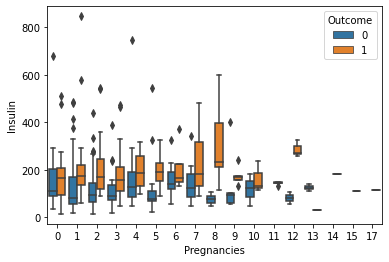

In [61]:
sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

# violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

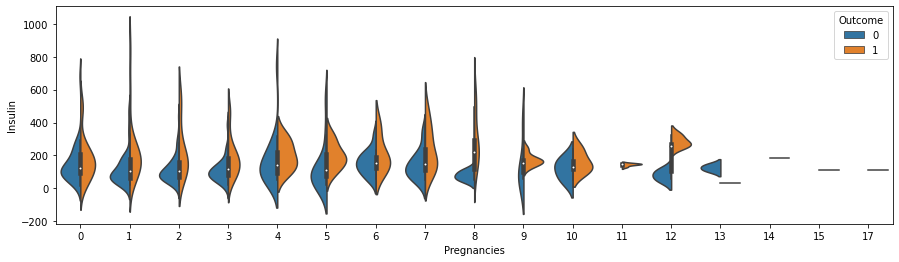

In [65]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", 
               hue="Outcome", split=True)

# swarmplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

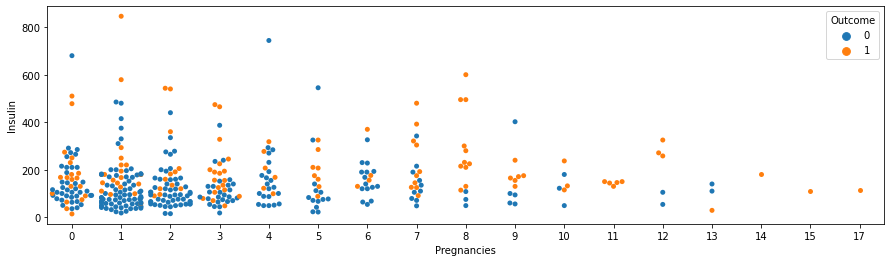

In [67]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", 
               hue="Outcome")

# distplot

In [73]:
df_0 = df[df["Outcome"]==0]
df_1 = df[df["Outcome"]==1]

df_0.shape, df_1.shape

((500, 10), (268, 10))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

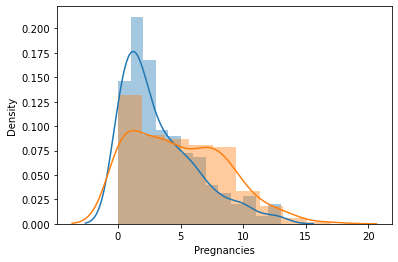

In [74]:
#한개의 수치형 데이터를 표현할때 사용
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-pack

<AxesSubplot:xlabel='Age', ylabel='Density'>

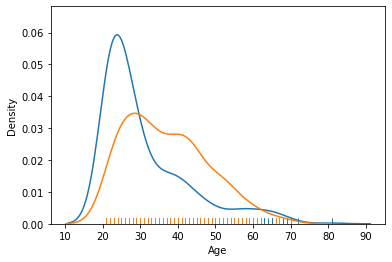

In [81]:
sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
sns.distplot(df_1["Age"], hist=False, rug=True, label="1")

# subplots

## pandas를 통한 histplot 그리기

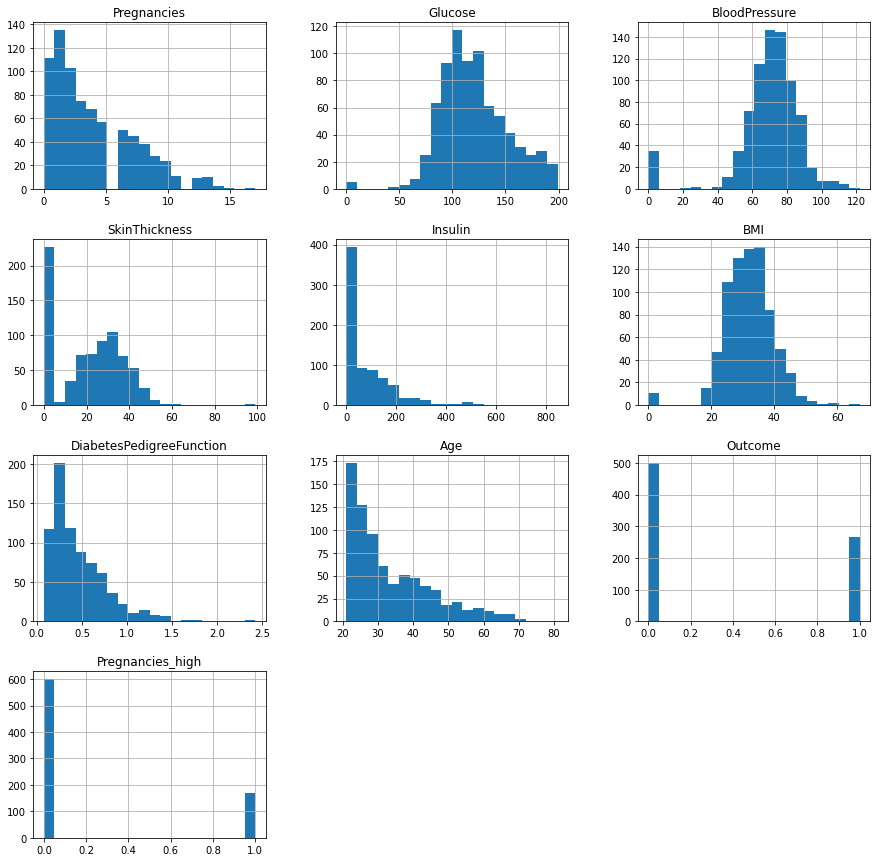

In [88]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15,15), bins=20)

## 반복문을 통한 서브플롯 그리기

### displot

In [89]:
col_num = df.columns.shape
col_num

(10,)

In [96]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

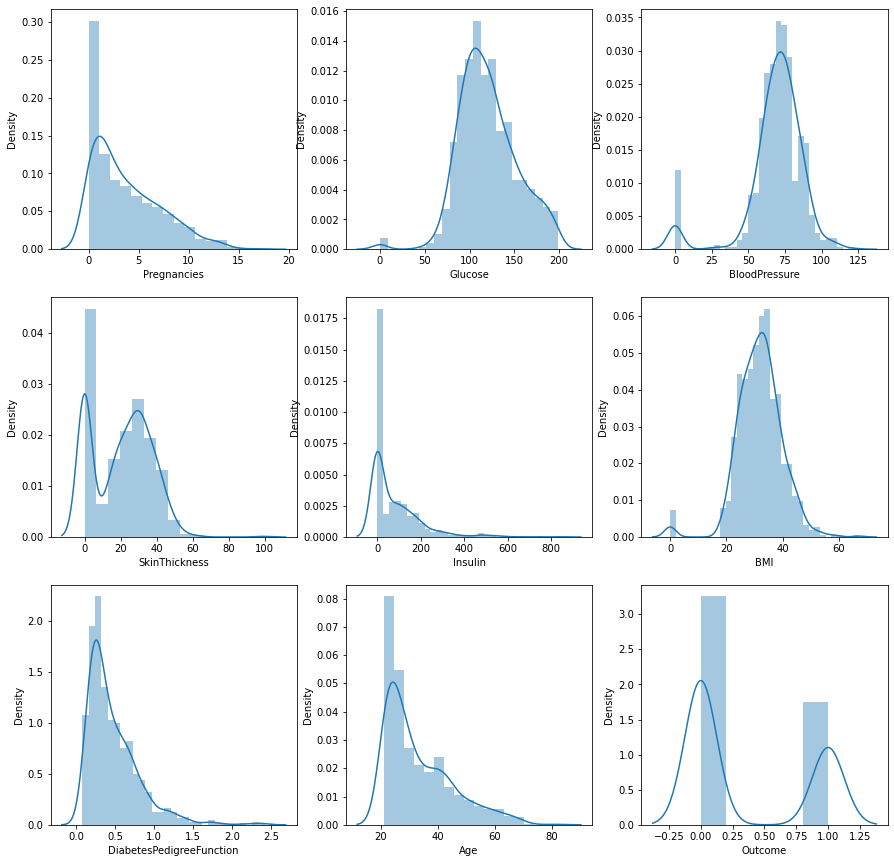

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])
    #print(i, col_name, row, col)
    
#sns.distplot(df["Outcome"], ax=axes[0][0])

In [ ]:
#연속된 수치를 범주형으로

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

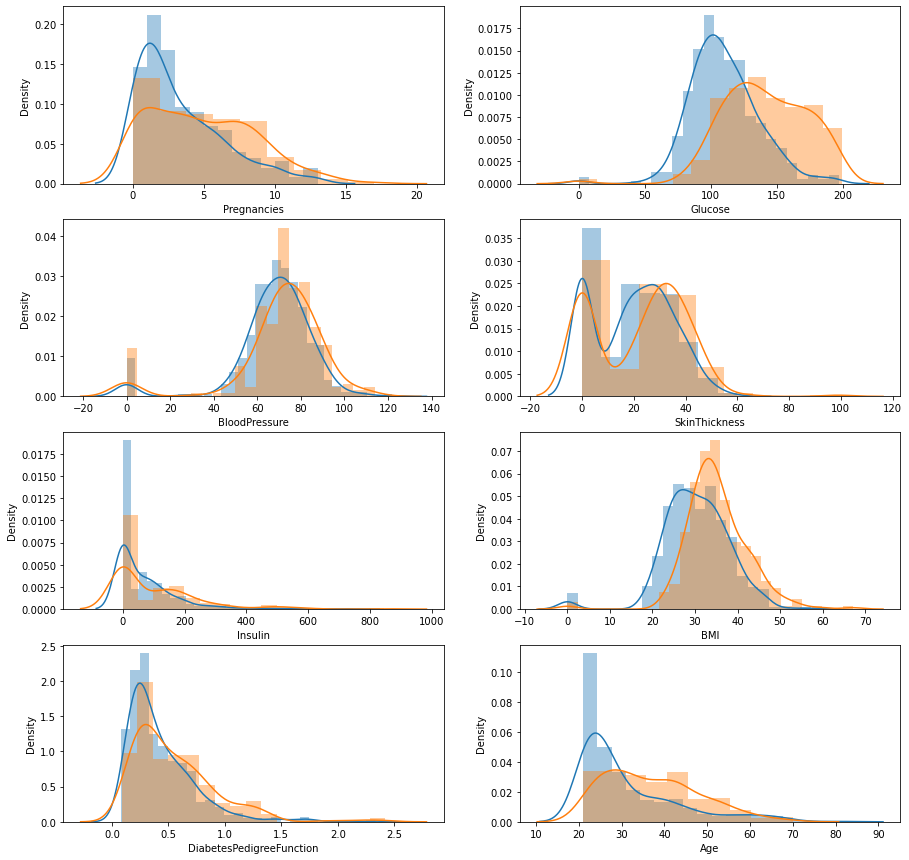

In [104]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

### violinplot

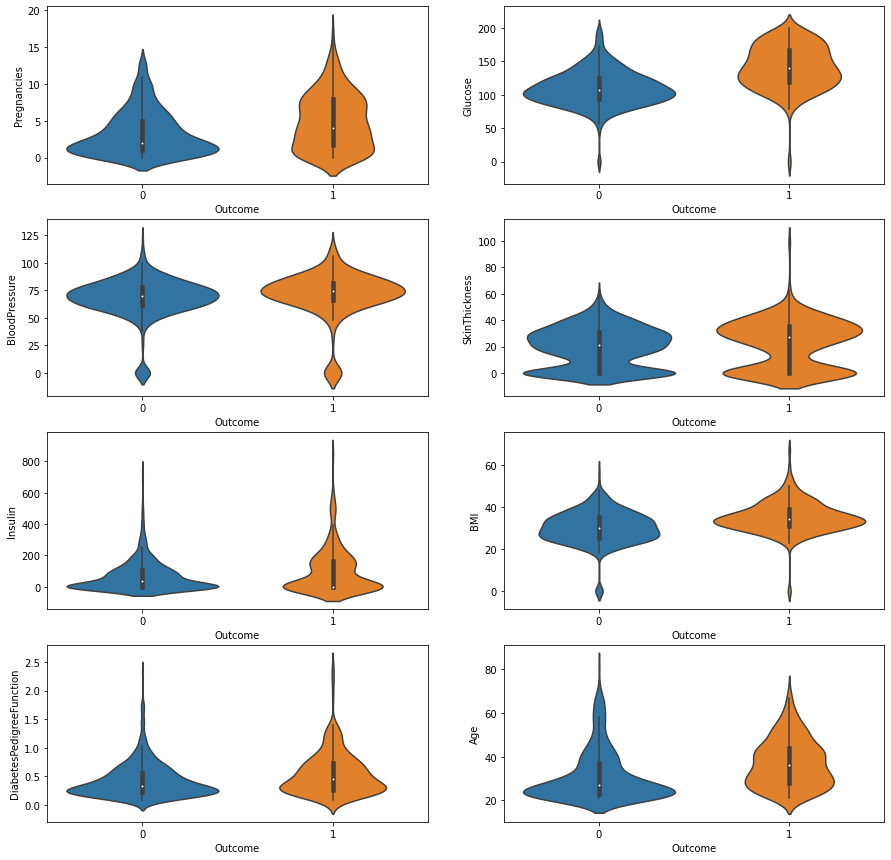

In [105]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

### lmplot

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

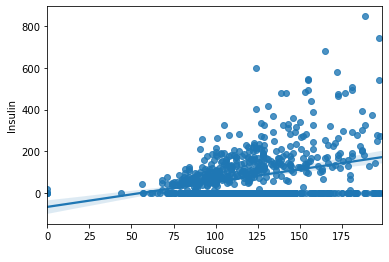

In [108]:
sns.regplot(data=df, x="Glucose", y="Insulin")

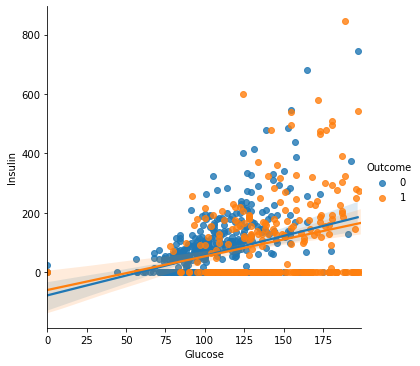

In [109]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

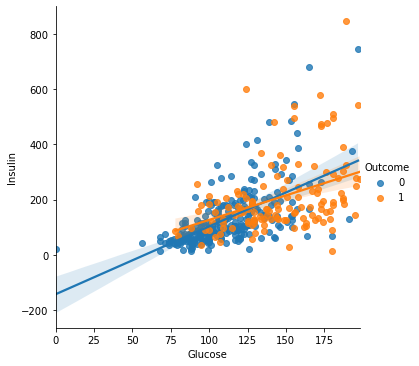

In [110]:
sns.lmplot(data=df[df["Insulin"]>0], x="Glucose", y="Insulin", hue="Outcome")

### pairplot

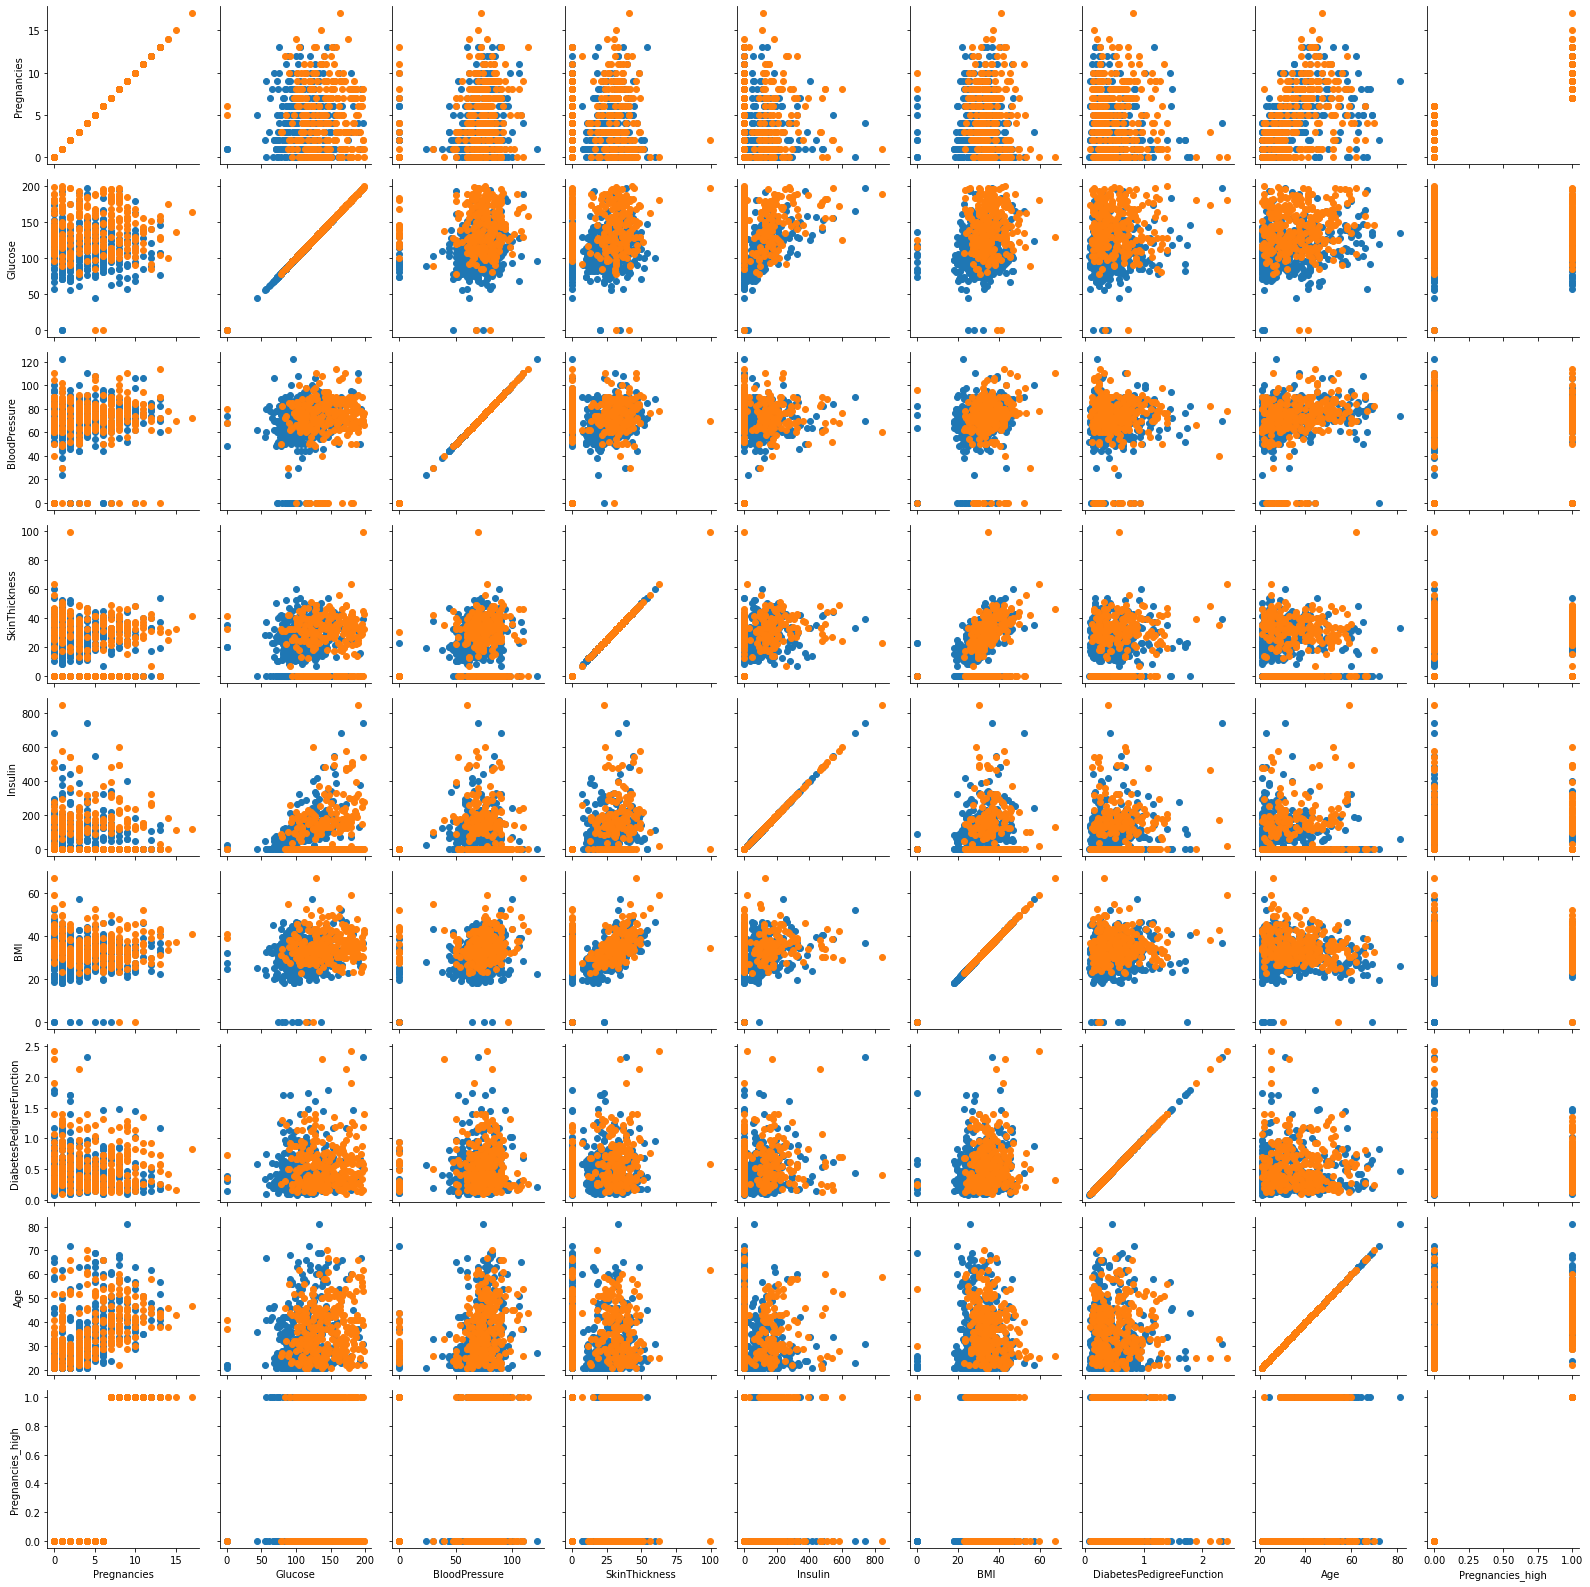

In [112]:
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

# 상관 분석

In [125]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [126]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

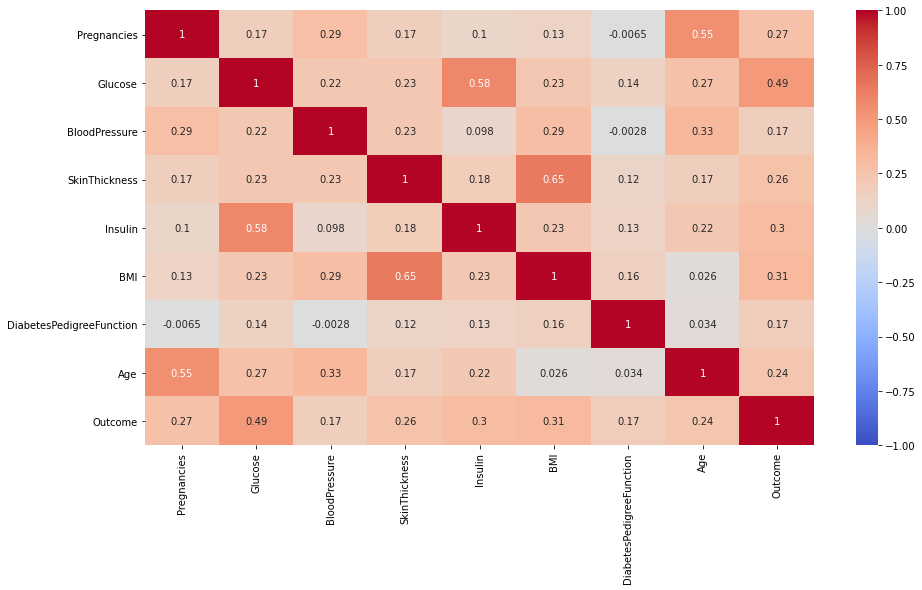

In [127]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, vmax=1, vmin=-1, 
            cmap="coolwarm", annot=True)

In [128]:
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관계수가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

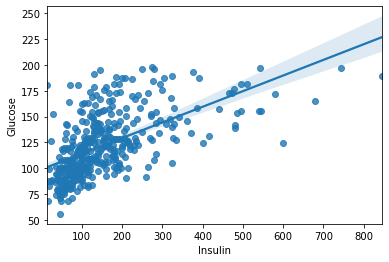

In [132]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

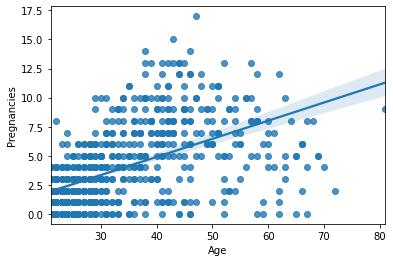

In [133]:
sns.regplot(data=df, x="Age", y="Pregnancies")

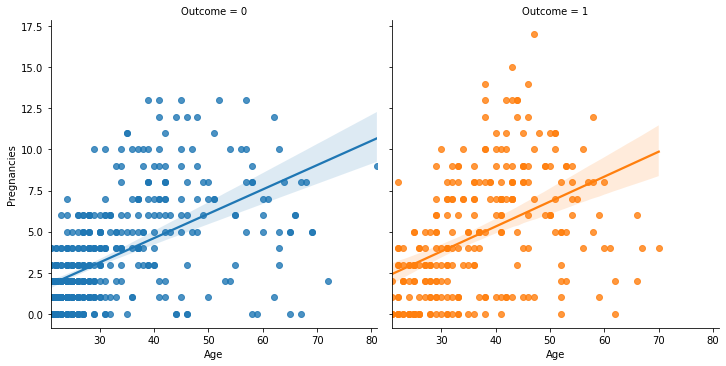

In [135]:
sns.lmplot(data=df, x="Age", y="Pregnancies", 
           hue="Outcome", col="Outcome")